In [13]:
# Import all necessary libraries.
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Download the data base with pandas.
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv'
yelp = pd.read_csv(url)

In [15]:
# Show the class distribution.
yelp.stars.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [16]:
# Filter the DataFrame using an OR condition.
yelp_best_and_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [19]:
# Define features and labels, i.e., X and y.
X = yelp_best_and_worst.text
y = yelp_best_and_worst.stars

In [328]:
# Split X and y into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [329]:
# Instantiate a CountVectorizer object.
vect = CountVectorizer(binary=True, stop_words='english', max_df=0.5, min_df=10, ngram_range=(1,3))

In [330]:
# Fit and transform X_train into X_train_dtm (document-term matrices - dtm).
X_train_dtm = vect.fit_transform(X_train)

In [331]:
# Transform X_test into X_test_dtm.
X_test_dtm = vect.transform(X_test)

In [332]:
# Instantiate a Bernoulli Naive Bayes model.
model = BernoulliNB(binarize=None)

In [333]:
# train the model using X_train_dtm
model.fit(X_train_dtm, y_train)

BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

In [334]:
y_pred_class = model.predict(X_test_dtm)

In [335]:
metrics.accuracy_score(y_test, y_pred_class)

0.87279843444227

In [336]:
y_test.value_counts()

5    823
1    199
Name: stars, dtype: int64

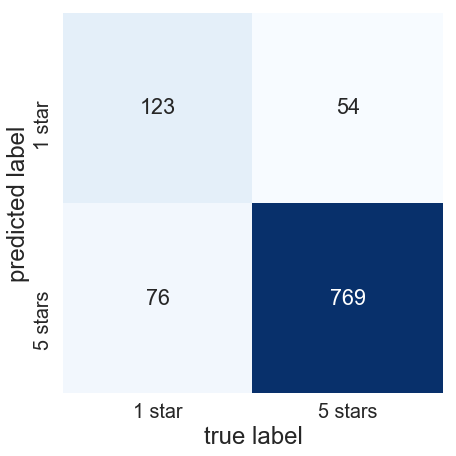

In [337]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['1 star','5 stars'], yticklabels=['1 star','5 stars'], cmap="Blues")
plt.xlabel('true label', fontsize=24)
plt.ylabel('predicted label', fontsize=24)
plt.show()

In [341]:
# Getting the probabilities for each class.
y_prob = model.predict_proba(X_test_dtm)
# Calculating ROC curve and ROC AUC.
y_test.map({1:0, 5:1})

#sms.label.map({'ham':0, 'spam':1})

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

1406    0
1792    1
7723    1
2416    1
6111    1
5611    1
1615    1
777     1
389     0
2504    1
8759    1
2060    0
244     1
4479    1
9050    1
354     1
3637    1
715     0
9089    1
5805    1
3886    1
4646    1
420     1
82      1
6905    1
5556    1
3898    1
5381    1
2488    1
8917    1
       ..
2237    0
2476    0
8422    1
8633    1
4014    1
1253    1
2426    1
241     1
7864    0
2477    1
8517    1
4365    1
4768    1
5867    1
8672    1
9378    1
1271    1
4490    1
6207    0
3426    0
8911    0
6045    0
610     1
9667    1
5487    1
4729    1
3305    1
2249    1
1443    1
3652    0
Name: stars, Length: 1022, dtype: int64


ValueError: Data is not binary and pos_label is not specified